In [1]:
from SimPlots import *

## Variables to Investigate
- Noise
- Duration of SSE
- Proportion cases sampled 
- Size of SSE
- Evolution of sequences (Poisson or not or something else)
- $R_0$ and $k$
- Probability threshold and Leiden community detection algorithm resolution parameter affects clustering at varying noise

In [2]:
plot_epi_time_scales_model(betas={"noise_exp_inf": 5, "noise_inf_sym": 5, "scale_inf_trans": 2, "scale_sym_test": 1})

interactive(children=(FloatSlider(value=4.0, description='Latent Period', layout=Layout(height='40px', margin=…

## With Poisson Substitution Model

In [3]:
param_dict = {
    "size_sse": 30,
    "R0": 1.5,
    "k": 0.5,
    "n_generations": 5,
    "generation_time": 5,
    "gen_length": 1000,  # Didn't use actual genome length 29903 to reduce computational time
    "clock_rate": 0.08,  # (1e-3 / 365) * 29903 substitution rate (number of mutations per genome per year)
    
    "dur_sse": 1,
    "base": False,
    "prop_sampled": 0.5,
    
    "latent_period": 4,
    "incubation_period": 5,
    
    "noise_exp_inf": 1.01,
    "noise_inf_sym": 1.01,
    
    "shape_sym_test": 3,
    "scale_sym_test": 0,
    
    "shape_inf_trans": 4,
    "scale_inf_trans": 0,
    "alpha": 0.0,
     "betas": {"noise_exp_inf": 5, "noise_inf_sym": 5, "scale_inf_trans": 2, "scale_sym_test": 1}
}

para_name = "alpha"
param_range = np.linspace(0, 1, 10)
num_sims = 4

alpha_sim = run_simulations(param_dict, "alpha", param_range, num_sims=num_sims)

Job 4/4 (4.8 s) •••••••••••••••••••••••••••••• 100%
Job 4/4 (4.7 s) •••••••••••••••••••••••••••••• 100%
Job 4/4 (4.7 s) •••••••••••••••••••••••••••••• 100%
Job 4/4 (4.7 s) •••••••••••••••••••••••••••••• 100%
Job 4/4 (4.7 s) •••••••••••••••••••••••••••••• 100%
Job 4/4 (5.5 s) •••••••••••••••••••••••••••••• 100%
Job 4/4 (4.8 s) •••••••••••••••••••••••••••••• 100%
Job 4/4 (5.0 s) •••••••••••••••••••••••••••••• 100%
Job 4/4 (4.9 s) •••••••••••••••••••••••••••••• 100%
Job 4/4 (4.8 s) •••••••••••••••••••••••••••••• 100%
Simulation Done
alpha : [0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]

Elapsed time: 50.6 s


### Base Simulation

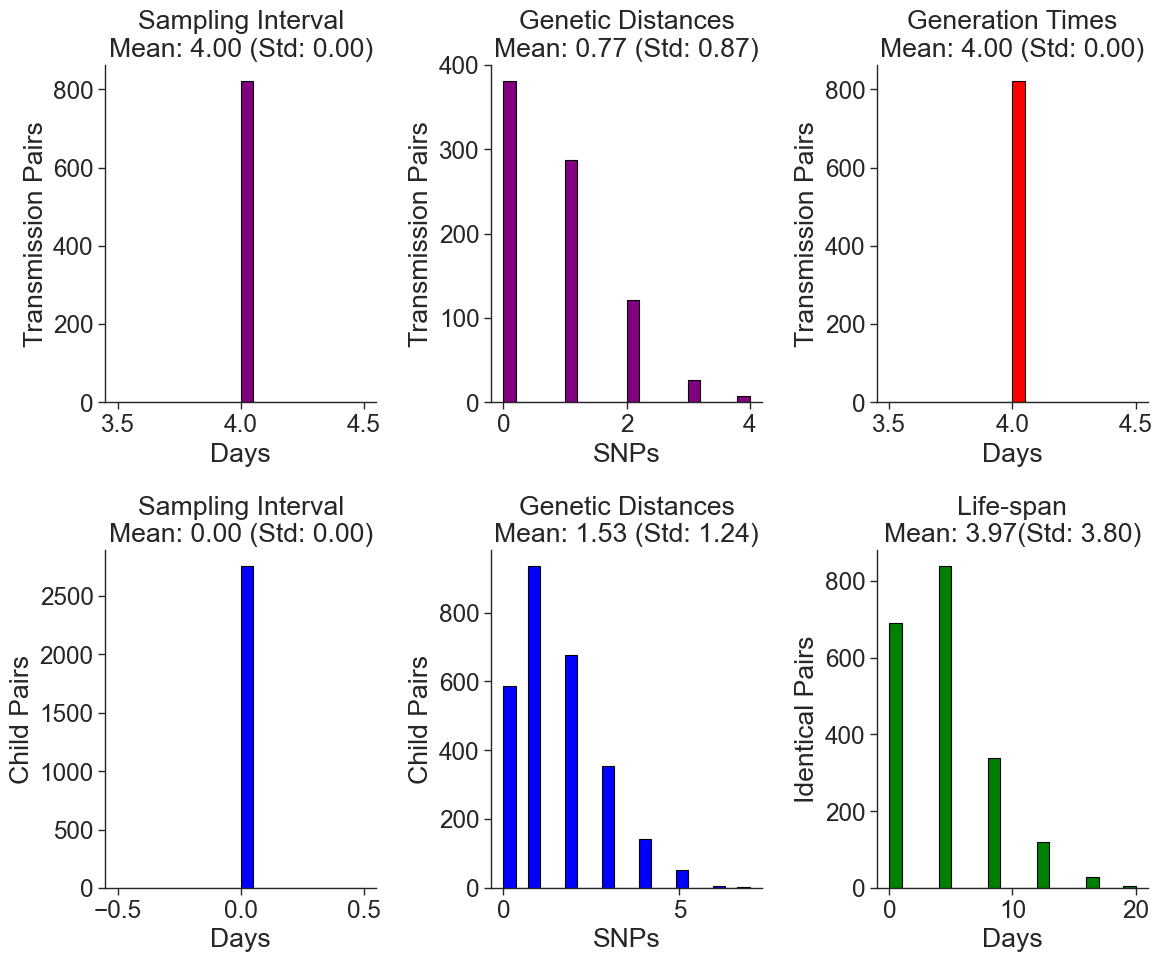

In [4]:
plot_epi_data(alpha_sim[0][0])

In [5]:
alpha_sim_analysed = analyse_simulations(alpha_sim, "alpha")
sc.save("../OutputFiles/Simulations/alpha_simulations_analysed.obj", alpha_sim_analysed)
# alpha_sim_analysed = sc.load("../OutputFiles/Simulations/alpha_simulations_analysed.obj")

Job 4/4 (0.7 s) •••••••••••••••••••••••••••••• 100%
Job 4/4 (3.5 s) •••••••••••••••••••••••••••••• 100%
Job 4/4 (0.5 s) •••••••••••••••••••••••••••••• 100%
Job 4/4 (0.5 s) •••••••••••••••••••••••••••••• 100%
Job 4/4 (0.6 s) •••••••••••••••••••••••••••••• 100%
Job 4/4 (0.5 s) •••••••••••••••••••••••••••••• 100%
Job 4/4 (0.5 s) •••••••••••••••••••••••••••••• 100%
Job 4/4 (0.7 s) •••••••••••••••••••••••••••••• 100%
Job 4/4 (0.5 s) •••••••••••••••••••••••••••••• 100%
Job 4/4 (0.5 s) •••••••••••••••••••••••••••••• 100%
Elapsed time: 32.2 s


'/Users/ydnkka/Desktop/Repositories/PhD/OutputFiles/Simulations/alpha_simulations_analysed.obj'

In [6]:
alpha_sim_analysed["SSEOptParams"]

{'QI': 0.6993149344294382,
 'Probability': 0.7809035391174345,
 'Resolution': 0.1}

Mean significant cluster size threshold 5.0


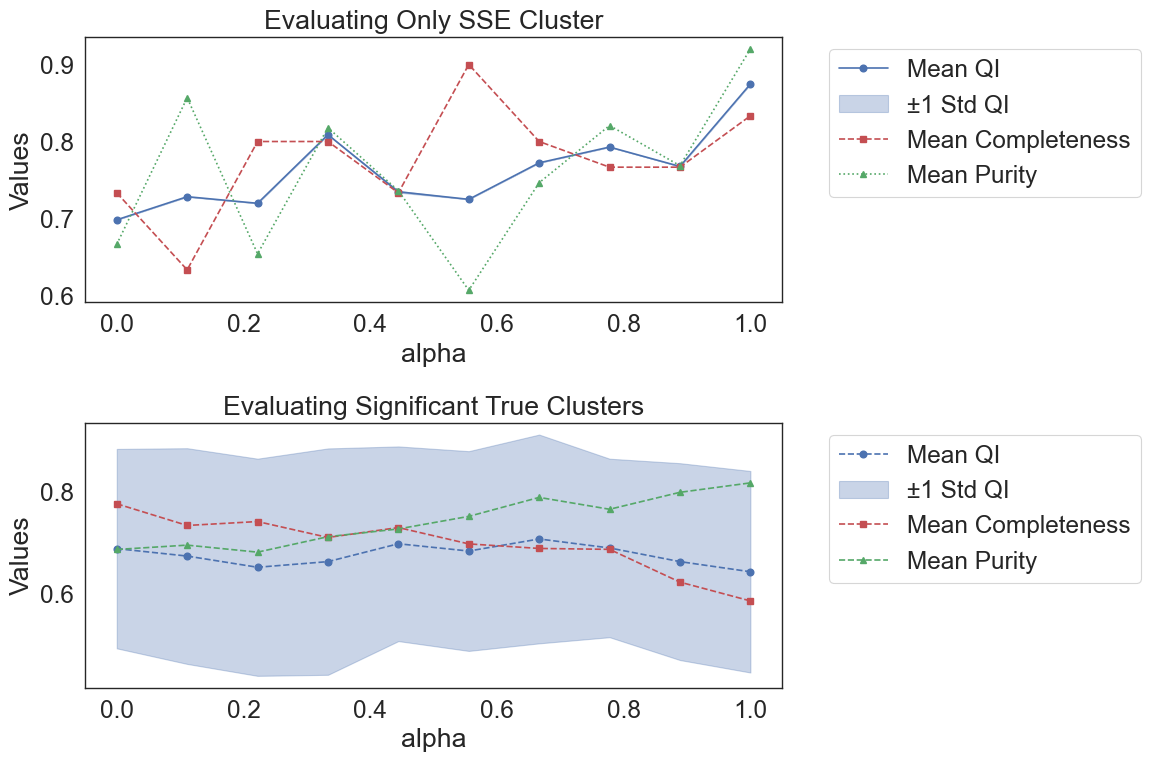

In [8]:
plot_clustering_analysis(alpha_sim_analysed, "alpha")

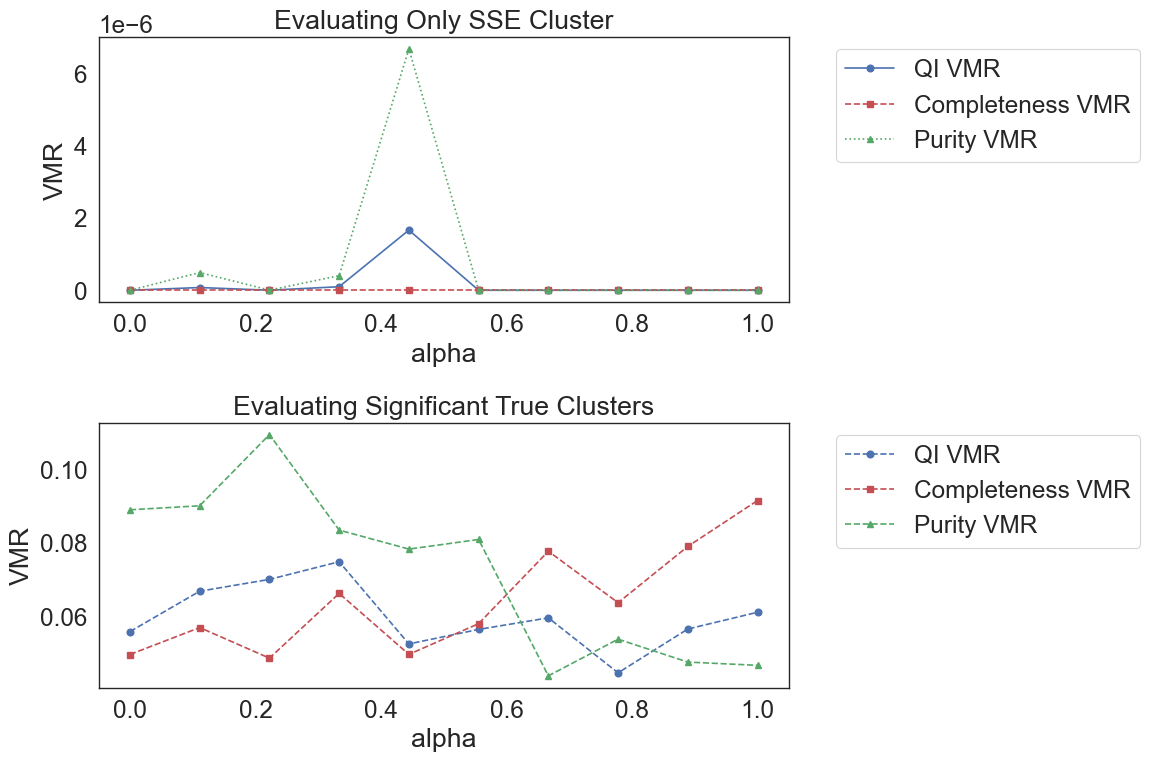

In [9]:
plot_clustering_analysis_vrm(alpha_sim_analysed, "alpha")

## Without Poisson Substitution Model

In [25]:
evol_base_param_dict = param_dict.copy()
evol_base_param_dict["base"] = True
alpha_evol_base_sim = run_simulations(evol_base_param_dict, "alpha", param_range, num_sims=num_sims)

Job 4/4 (14.5 s) •••••••••••••••••••••••••••••• 100%
Job 4/4 (14.2 s) •••••••••••••••••••••••••••••• 100%
Job 4/4 (14.2 s) •••••••••••••••••••••••••••••• 100%
Job 4/4 (14.7 s) •••••••••••••••••••••••••••••• 100%
Job 4/4 (14.3 s) •••••••••••••••••••••••••••••• 100%
Job 4/4 (14.6 s) •••••••••••••••••••••••••••••• 100%
Job 4/4 (14.7 s) •••••••••••••••••••••••••••••• 100%
Job 4/4 (15.0 s) •••••••••••••••••••••••••••••• 100%
Job 4/4 (14.7 s) •••••••••••••••••••••••••••••• 100%
Job 4/4 (15.2 s) •••••••••••••••••••••••••••••• 100%
Simulation Done
alpha : [0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]

Elapsed time: 164 s


### Base Simulation

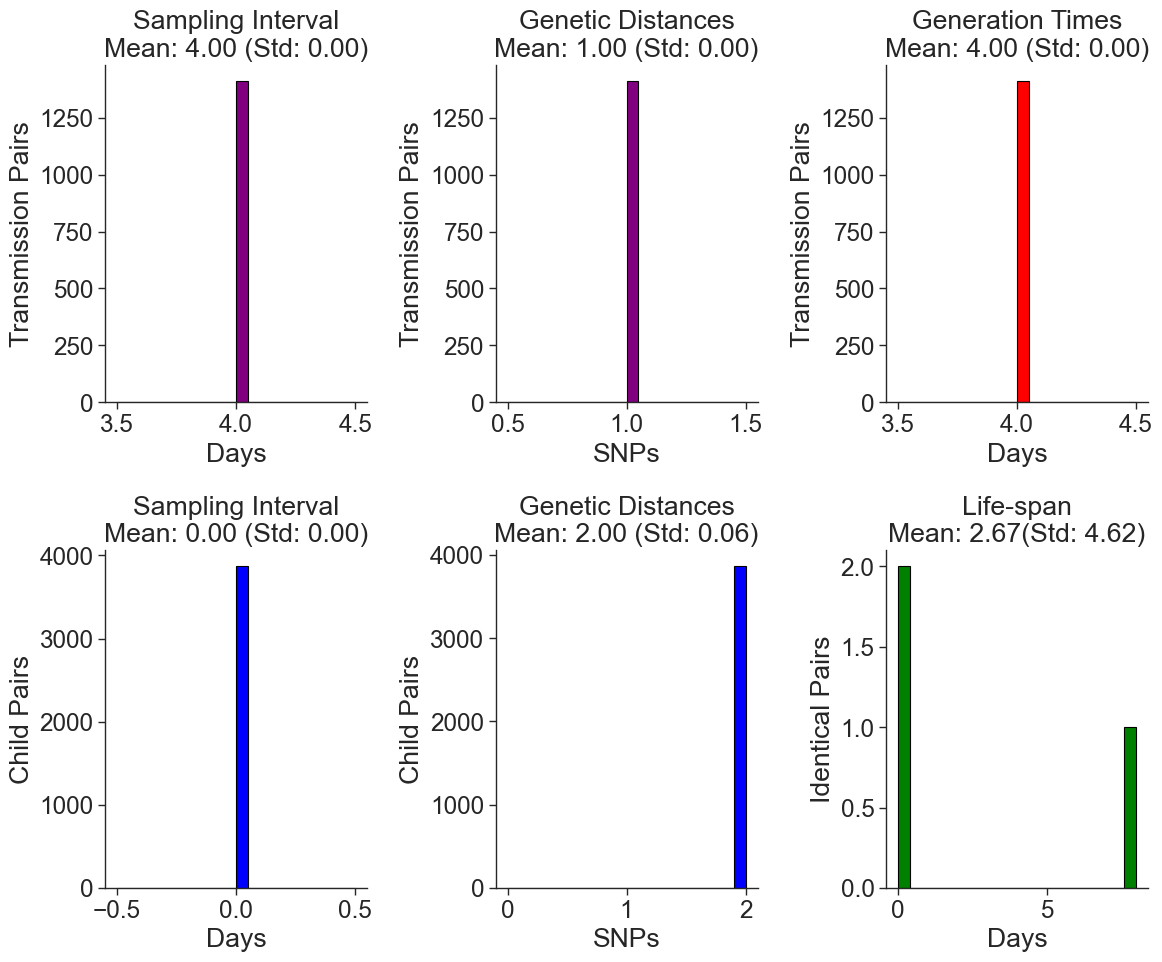

In [26]:
plot_epi_data(alpha_evol_base_sim[0][0])

In [27]:
alpha_base_evol_sim_analysed = analyse_simulations(alpha_evol_base_sim, "alpha")
sc.save("../OutputFiles/Simulations/alpha_base_evol_simulations_analysed.obj", alpha_base_evol_sim_analysed)
# alpha_base_evol_sim_analysed = sc.load("../OutputFiles/Simulations/alpha_base_evol_simulations_analysed.obj")

Job 4/4 (1.0 s) •••••••••••••••••••••••••••••• 100%
Job 4/4 (1.0 s) •••••••••••••••••••••••••••••• 100%
Job 4/4 (1.1 s) •••••••••••••••••••••••••••••• 100%
Job 4/4 (2.0 s) •••••••••••••••••••••••••••••• 100%
Job 4/4 (1.0 s) •••••••••••••••••••••••••••••• 100%
Job 4/4 (1.2 s) •••••••••••••••••••••••••••••• 100%
Job 4/4 (1.0 s) •••••••••••••••••••••••••••••• 100%
Job 4/4 (1.0 s) •••••••••••••••••••••••••••••• 100%
Job 4/4 (1.2 s) •••••••••••••••••••••••••••••• 100%
Job 4/4 (1.2 s) •••••••••••••••••••••••••••••• 100%
Elapsed time: 51.5 s


'/Users/ydnkka/Desktop/Repositories/PhD/OutputFiles/Simulations/alpha_base_evol_simulations_analysed.obj'

In [28]:
alpha_base_evol_sim_analysed["SSEOptParams"]

{'QI': 0.9836065573770492,
 'Probability': 0.5776780699756758,
 'Resolution': 0.5}

Mean significant cluster size threshold 5.0


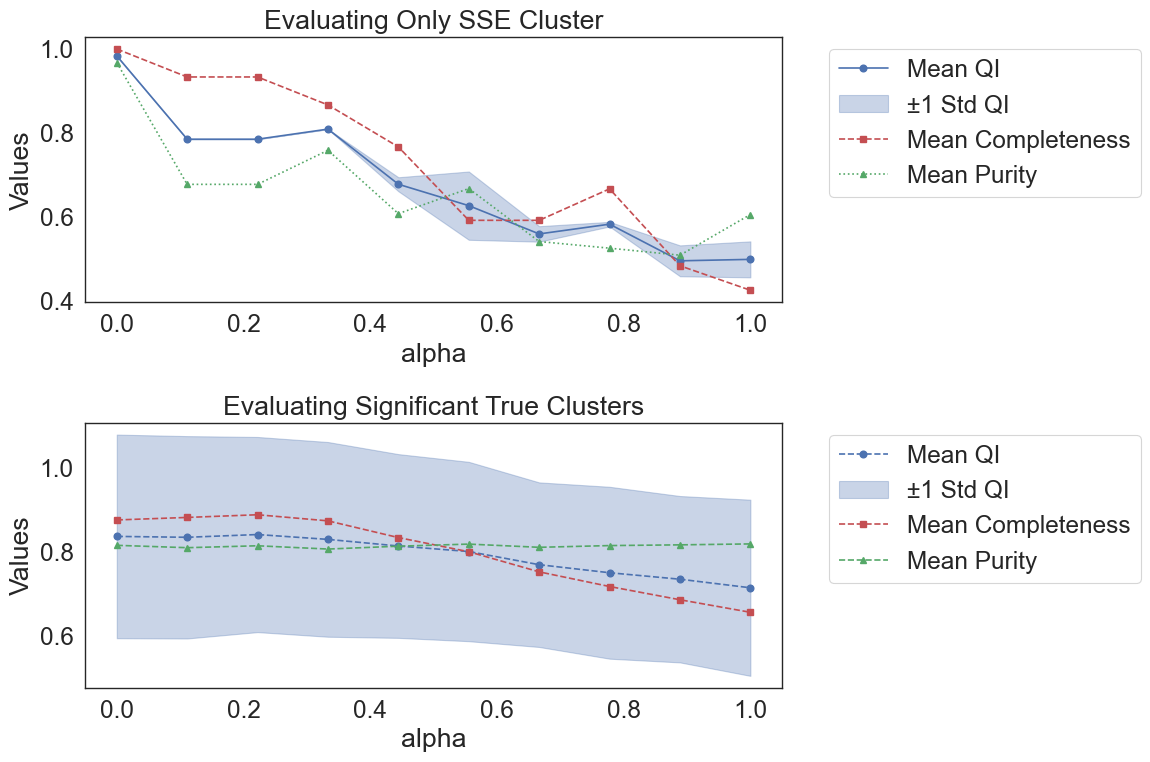

In [29]:
plot_clustering_analysis(alpha_base_evol_sim_analysed, "alpha")

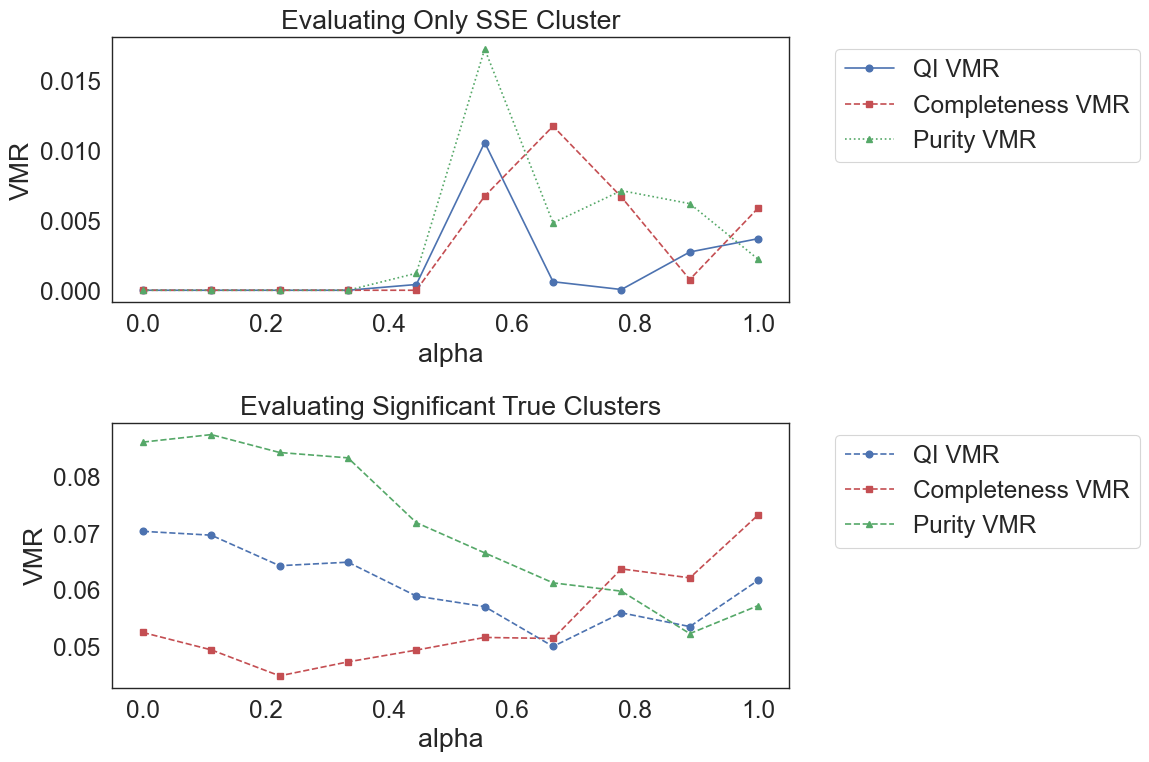

In [30]:
plot_clustering_analysis_vrm(alpha_base_evol_sim_analysed, "alpha")